In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(array,bin_num,default=True):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    return bins, n

def colour_plot_hist(array,label,colour,default=False):
    array = [row[0]-row[1] for row in array if row[0]>0 and row[1] > 0]
    bin_num = int((np.max(array)-np.min(array))/0.01)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid',color=colour)
    return 

def petro_plot_hist(array,label,default=False):
    array = [row[1] for row in array]
    bin_num = int((np.max(array)-np.min(array))/0.01)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return n,bins

def surface_brightness_plot_hist(array,label,bin_num=800,default=False):
    array = [row[1]+2.5*np.log10(2*np.pi*row[4]*row[4]) for row in array]
    bin_num = int((np.max(array)-np.min(array))/0.005)
    n, bins = np.histogram(array,bins=bin_num,normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return 

def redshifts_plot_hist(array,label,bin_num=800,default=False):
    array = [row[3] for row in array if 0.3 > row[3] > 0.01 ]
    bin_num = int((np.max(array)-np.min(array))/0.01)
    print(bin_num)
    n, bins = np.histogram(array,bins=int(bin_num),normed=default)
    plt.plot(bins[1:],n,label=label,drawstyle='steps-mid')
    return n, bins


# this notebook is looking at how the final selection compares to the MGS in each band pass
# each array has the exact same rows: 0 u, 1 r, 2 mr_petro, 3 z, 4 petroR50_r

In [17]:
mgs = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mgs_colours.npy')
galex = np.load('/home/calum/Documents/Mphys_data/cat_check/all_galex_colours.npy')
wise = np.load('/home/calum/Documents/Mphys_data/cat_check/all_wise_colours.npy')
ukidss = np.load('/home/calum/Documents/Mphys_data/cat_check/all_ukidss_colours.npy')
mw = np.load('/home/calum/Documents/Mphys_data/cat_check/all_mw_colours.npy')

len(mgs), len(wise), len(galex), len(ukidss), len(mw)

(585984, 109901, 80161, 131938, 71504)

In [18]:
len([row for row in mgs if 0.08>row[3]>0.004 and 17.6>row[2]>14.5])

156135

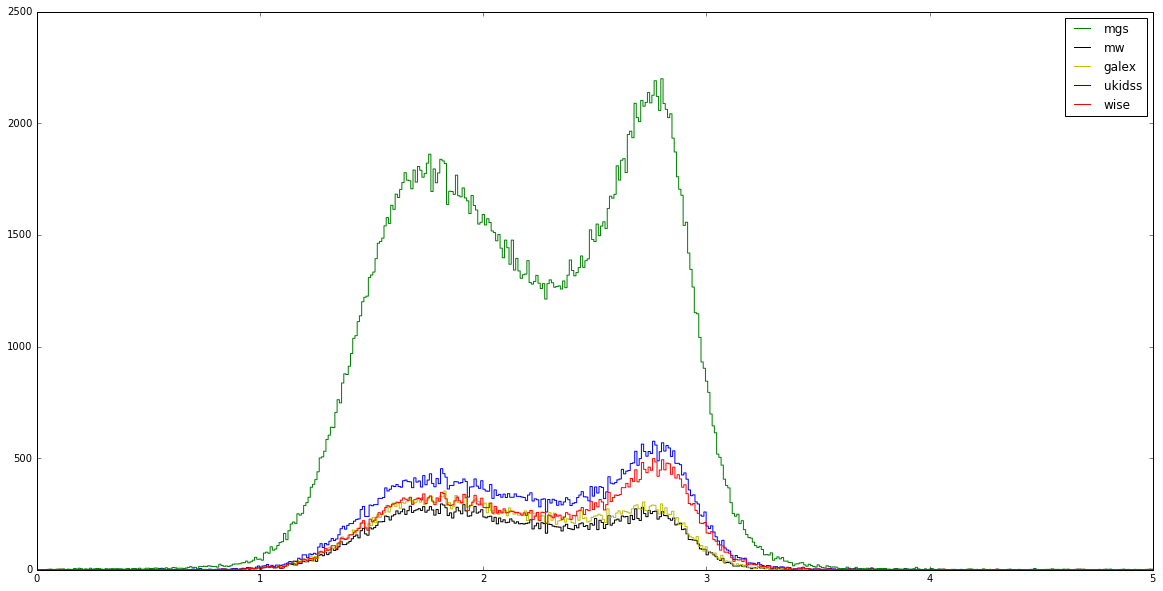

In [19]:
plt.figure(figsize=(20,10))
colour_plot_hist([row for row in mgs if 0.1>row[3]>0.004],'mgs','g')
colour_plot_hist([row for row in mw if 0.1>row[3]>0.004],'mw','k')
colour_plot_hist([row for row in galex if 0.1>row[3]>0.004],'galex','y')
colour_plot_hist([row for row in ukidss if 0.1>row[3]>0.004],'ukidss','b')
colour_plot_hist([row for row in wise if 0.1>row[3]>0.004],'wise','r')
plt.xlim(0,5)
plt.legend()

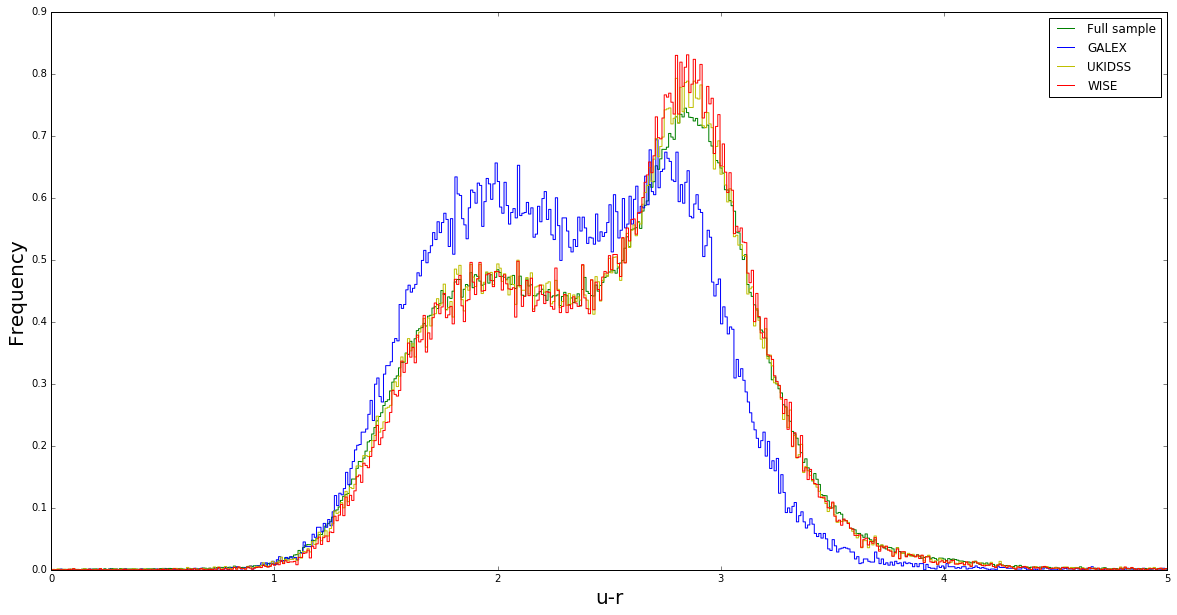

In [21]:
plt.figure(figsize=(20,10))
colour_plot_hist(mgs,'Full sample','g',default=True)
#colour_plot_hist(mw,'mw',default=True)
colour_plot_hist(galex,'GALEX','b',default=True)
colour_plot_hist(ukidss,'UKIDSS','y',default=True)
colour_plot_hist(wise,'WISE','r',default=True)
plt.xlim(0,5)
plt.xlabel('u-r',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend()

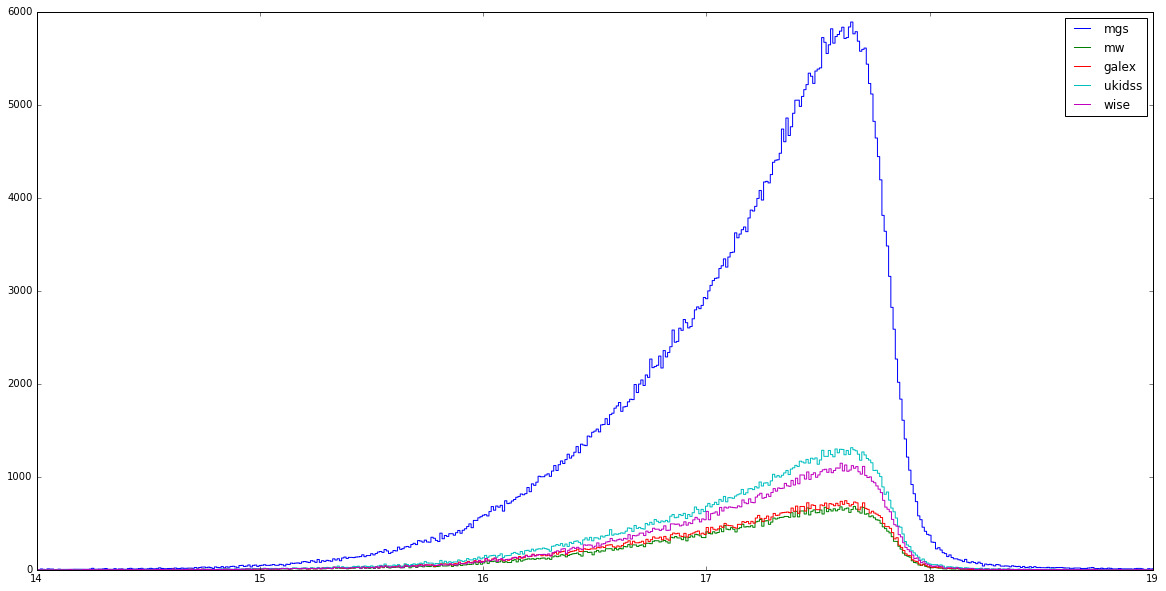

In [6]:
plt.figure(figsize=(20,10))
petro_plot_hist(mgs,'mgs')
petro_plot_hist(mw,'mw')
petro_plot_hist(galex,'galex')
petro_plot_hist(ukidss,'ukidss')
petro_plot_hist(wise,'wise')
plt.xlim(14,19)
plt.legend()

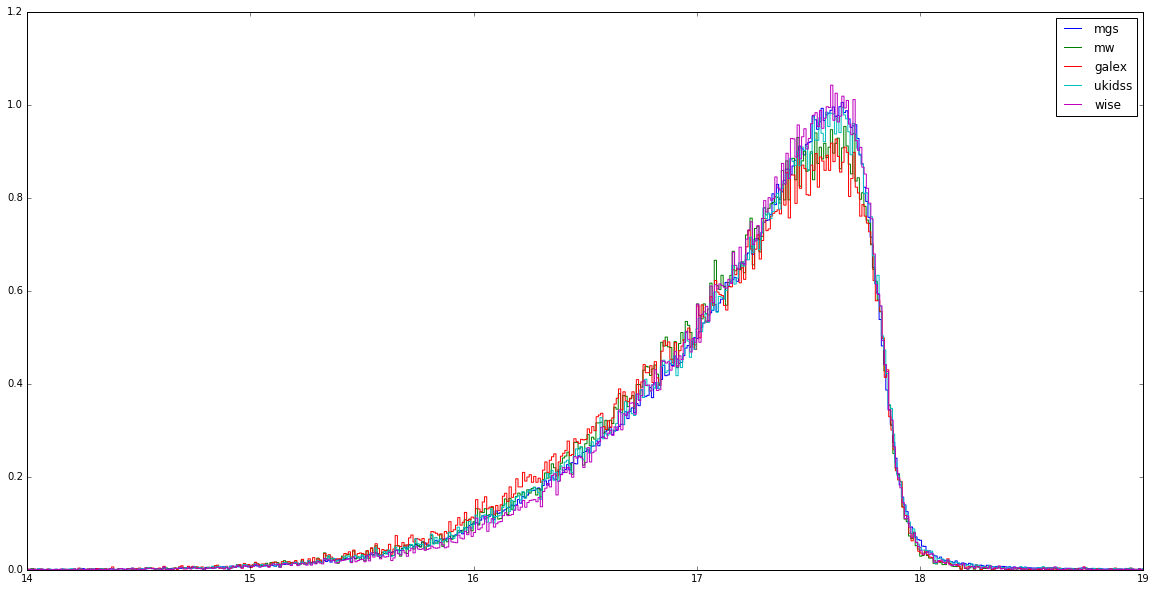

In [7]:
plt.figure(figsize=(20,10))
petro_plot_hist(mgs,'mgs',default=True)
n,bins = petro_plot_hist(mw,'mw',default=True)
petro_plot_hist(galex,'galex',default=True)
petro_plot_hist(ukidss,'ukidss',default=True)
petro_plot_hist(wise,'wise',default=True)
plt.xlim(14,19)
plt.legend()

In [8]:
np.argmax(n),bins[np.argmax(n)]

(596, 17.653389714699422)

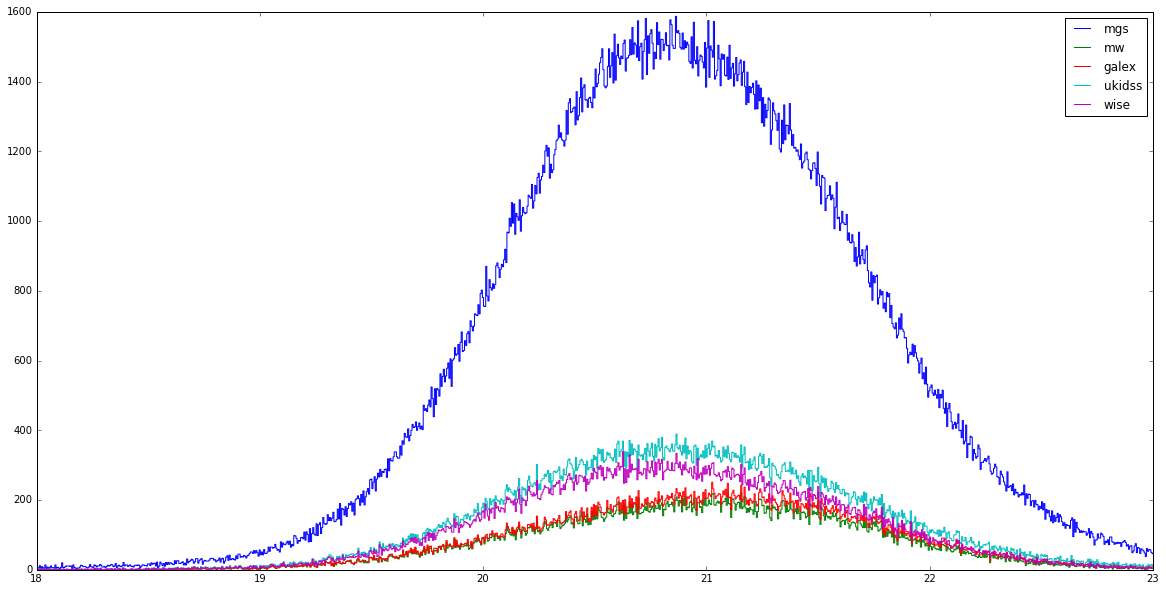

In [9]:
plt.figure(figsize=(20,10))
surface_brightness_plot_hist(mgs,'mgs')
surface_brightness_plot_hist(mw,'mw')
surface_brightness_plot_hist(galex,'galex')
surface_brightness_plot_hist(ukidss,'ukidss')
surface_brightness_plot_hist(wise,'wise')
plt.xlim(18,23)
plt.legend()

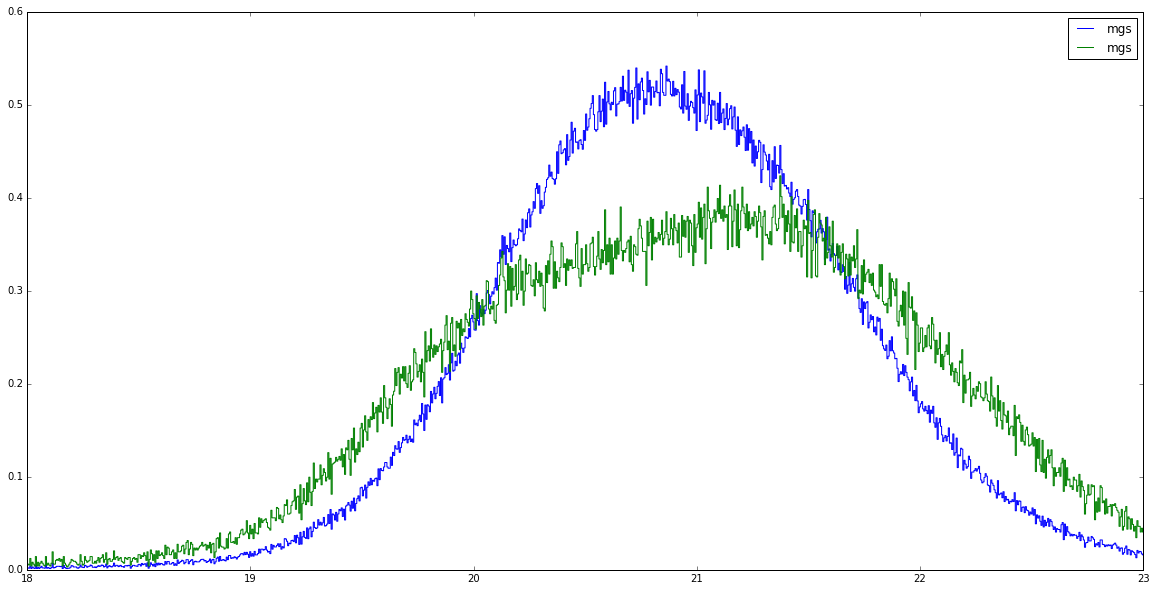

In [10]:
plt.figure(figsize=(20,10))
surface_brightness_plot_hist(mgs,'mgs',default=True)
surface_brightness_plot_hist([row for row in mgs if row[3] < 0.08],'mgs',default=True)
#surface_brightness_plot_hist(mw,'mw',default=True)
#surface_brightness_plot_hist(galex,'galex',default=True)
#surface_brightness_plot_hist(ukidss,'ukidss',default=True)
#surface_brightness_plot_hist(wise,'wise',default=True)
plt.xlim(18,23)
plt.legend()

In [11]:
mgs_z = [row[3] for row in mgs]
mw_z = [row[3] for row in mw]
wise_z = [row[3] for row in wise]
galex_z = [row[3] for row in galex]
ukidss_z = [row[3] for row in ukidss]
np.median(mgs_z), np.median(mw_z), np.median(wise_z), np.median(galex_z), np.median(ukidss_z)

(0.10182949155569077,
 0.094831816852092743,
 0.10156729817390442,
 0.092750430107116699,
 0.099099088460206985)

In [12]:
np.min(mgs_z), np.min(mw_z), np.min(wise_z), np.min(galex_z), np.min(ukidss_z)

(-0.010110554285347462,
 -0.0041360757313668728,
 -0.006568320095539093,
 -0.0041360757313668728,
 -0.006568320095539093)

In [13]:
np.max(mgs_z), np.max(mw_z), np.max(wise_z), np.max(galex_z), np.max(ukidss_z)

(7.0038695335388184,
 5.4451828002929688,
 5.4451828002929688,
 5.4451828002929688,
 6.7156400680541992)

289
289
289
289
289


(0, 0.3)

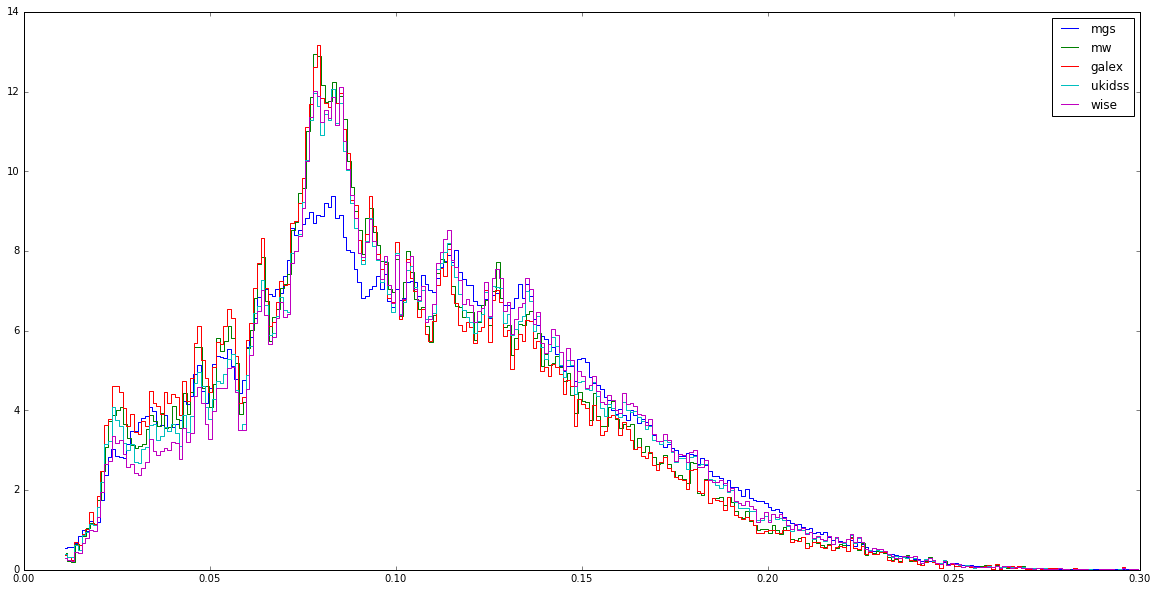

In [14]:
plt.figure(figsize=(20,10))
rmgs,bins = redshifts_plot_hist(mgs,'mgs',default=True)
rmw,_ = redshifts_plot_hist(mw,'mw',default=True)
rgalex,_ = redshifts_plot_hist(galex,'galex',default=True)
rukidss,_ = redshifts_plot_hist(ukidss,'ukidss',default=True)
rwise,_ = redshifts_plot_hist(wise,'wise',default=True)
plt.legend()
plt.xlim(0,0.3)

28
28
28
28
28


(0, 0.3)

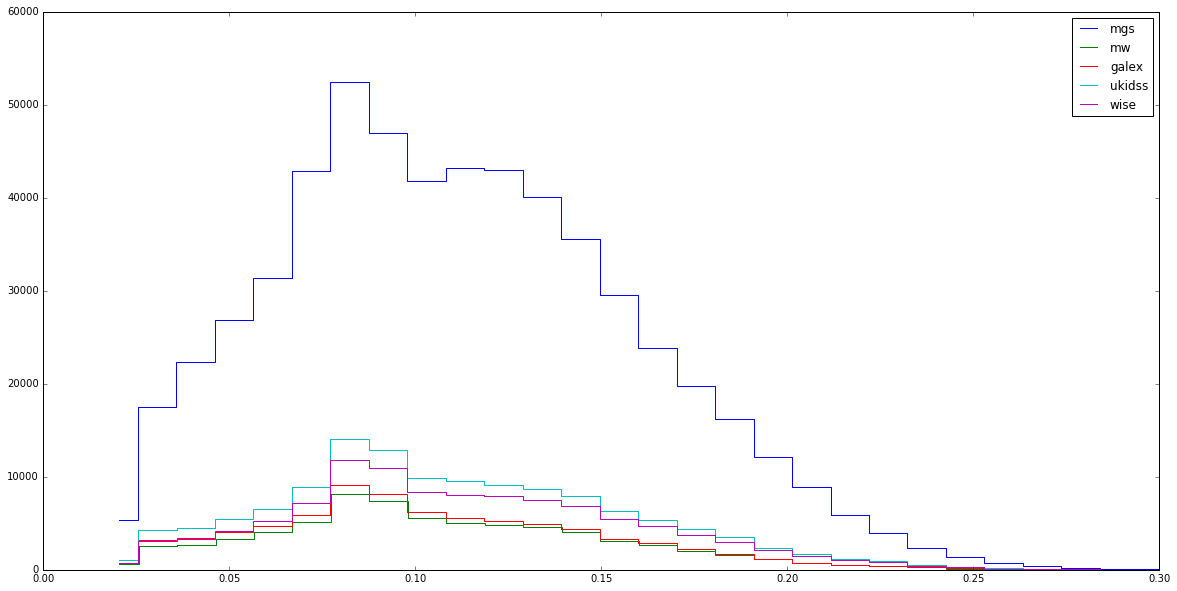

In [23]:
plt.figure(figsize=(20,10))
rmgs,bins = redshifts_plot_hist(mgs,'mgs',default=False)
rmw,_ = redshifts_plot_hist(mw,'mw',default=False)
rgalex,_ = redshifts_plot_hist(galex,'galex',default=False)
rukidss,_ = redshifts_plot_hist(ukidss,'ukidss',default=False)
rwise,_ = redshifts_plot_hist(wise,'wise',default=False)
plt.legend()
plt.xlim(0,0.3)

(0, 0.25)

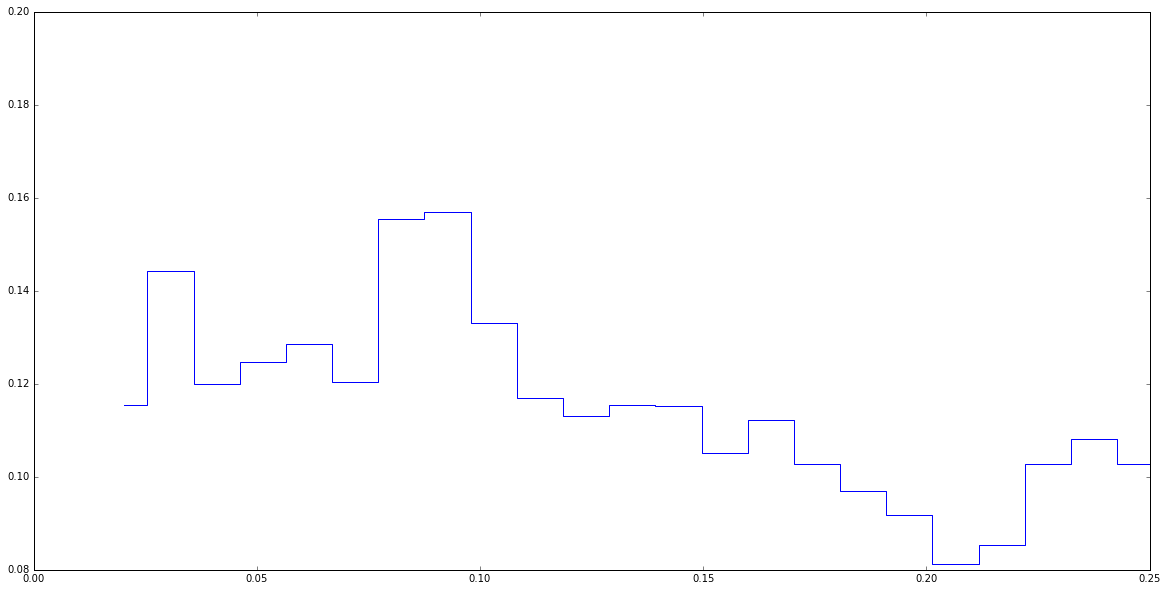

In [25]:
plt.figure(figsize=(20,10))
plt.plot(bins[1:],rmw/rmgs,drawstyle='steps-mid')
plt.xlim(0,0.25)